# movie_metadata - Initial Exploration

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import missingno as msno
import fractions

In [2]:
df = pd.read_csv('movie_metadata.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [4]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


<AxesSubplot:>

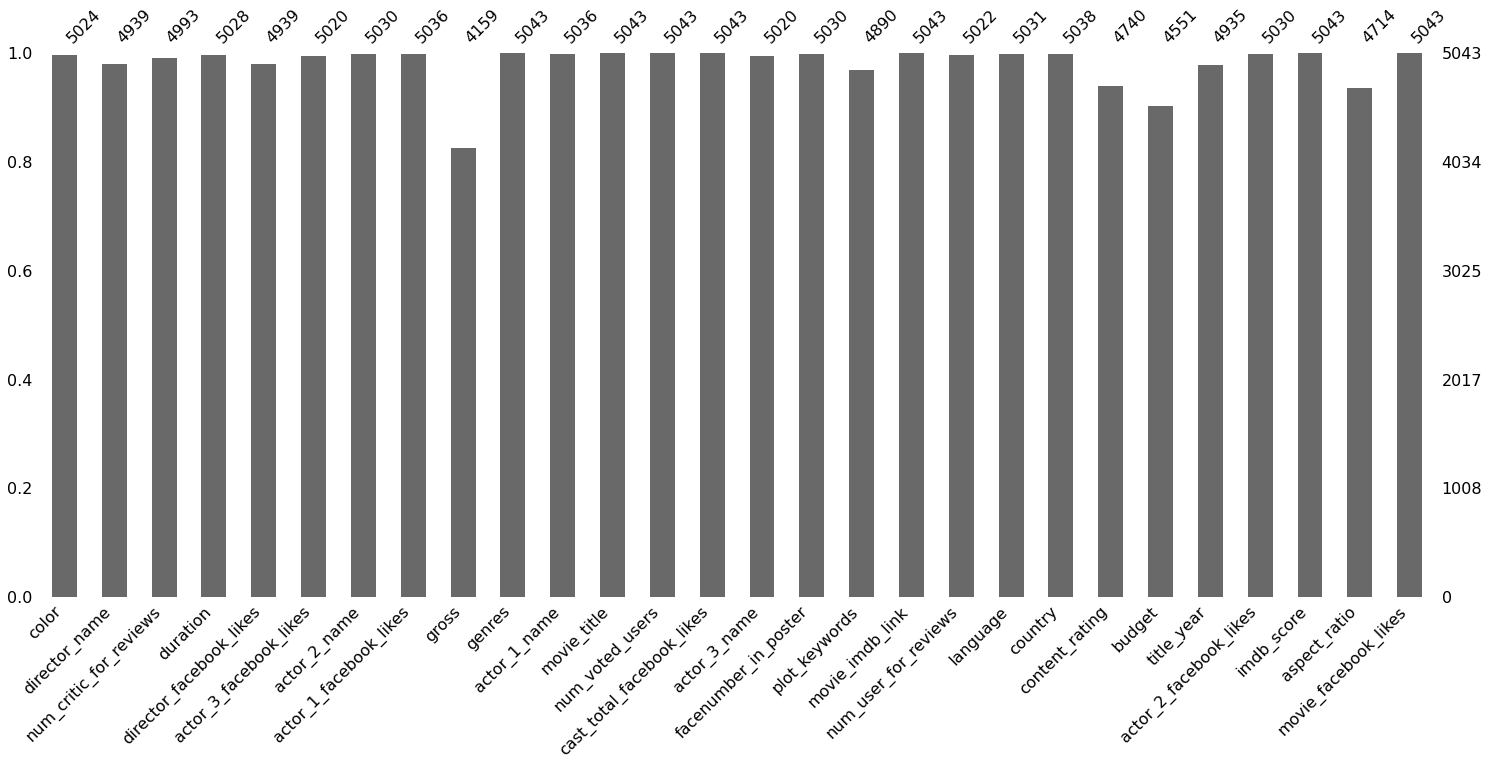

In [8]:
msno.bar(df)

<AxesSubplot:>

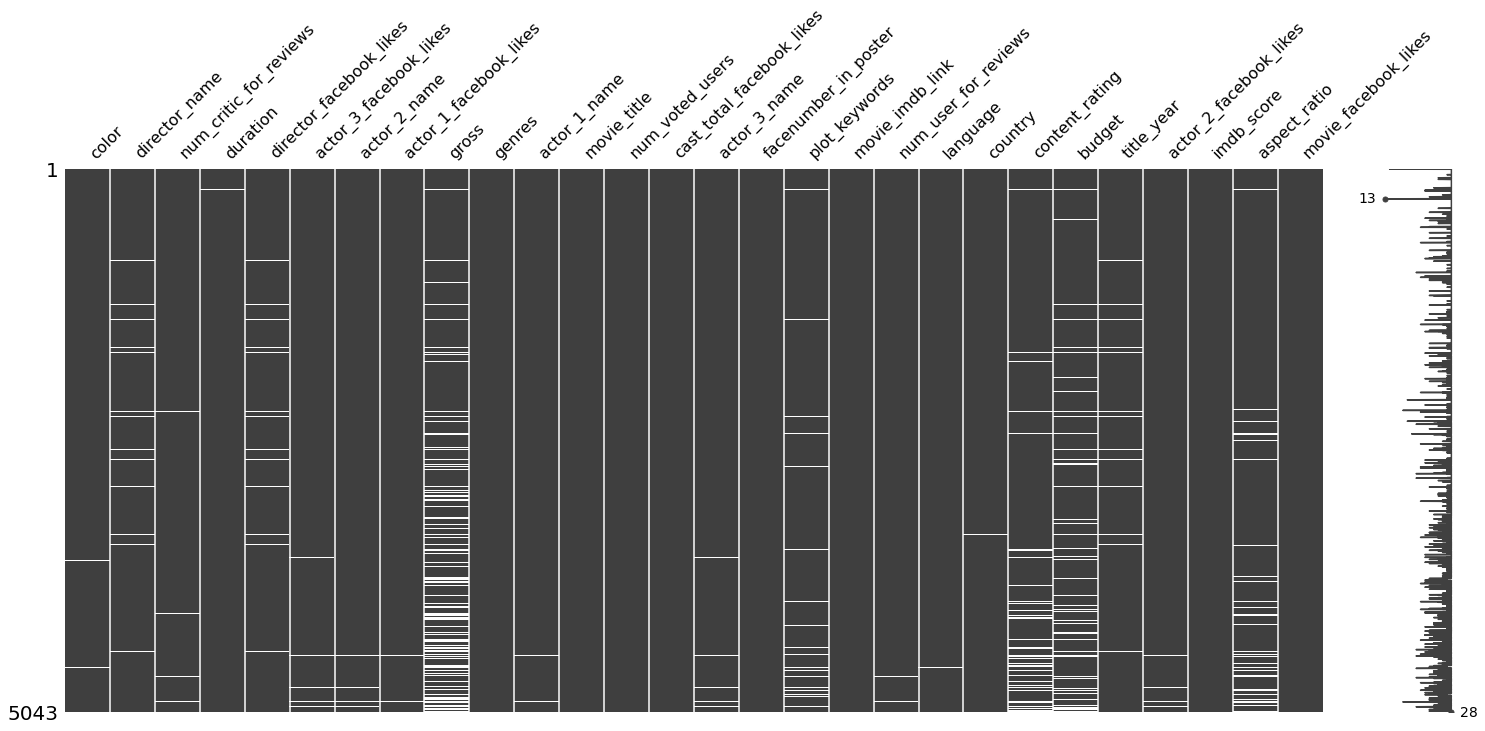

In [36]:
msno.matrix(df)

<AxesSubplot:>

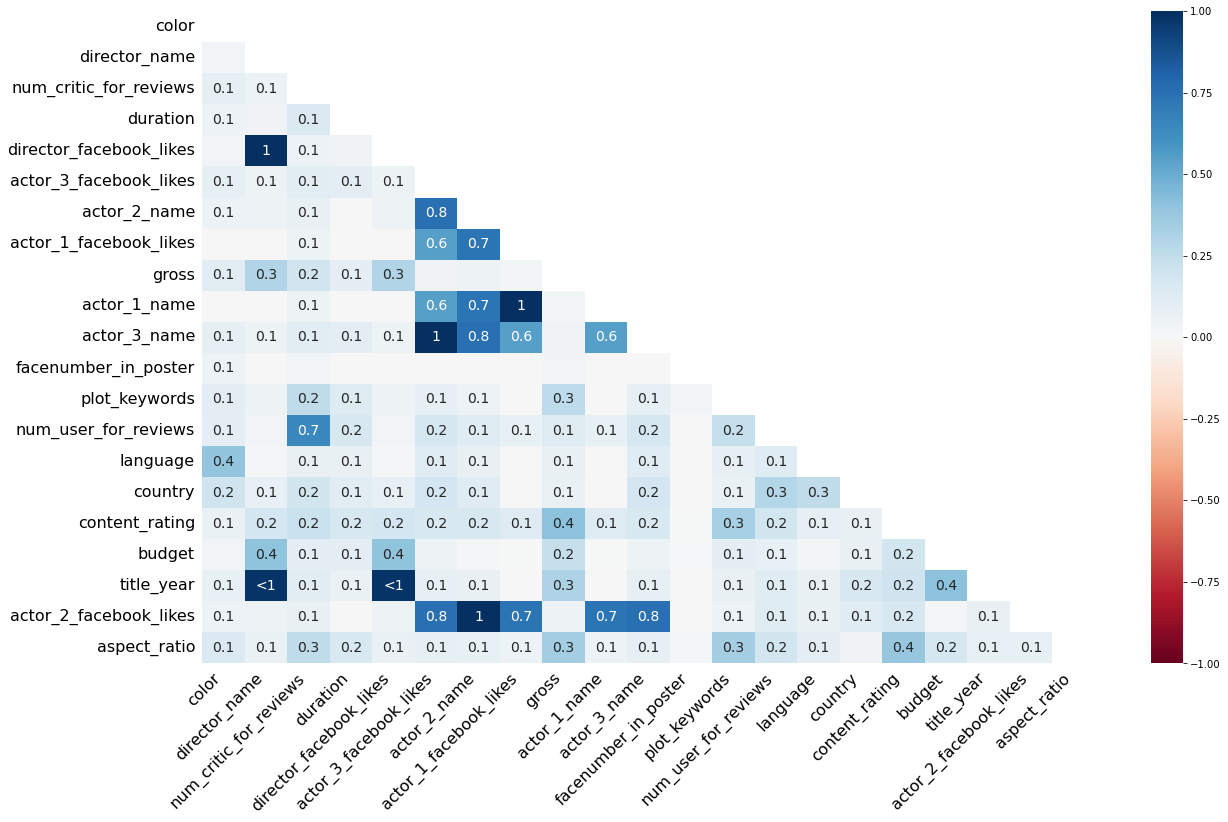

In [37]:
msno.heatmap(df)

In [44]:
df.loc[(df.content_rating.isnull()) & (df.gross.isnull() == False), ["movie_title","title_year", "content_rating"]].set_index("movie_title")

,title_year,content_rating
movie_title,,
Baahubali: The Beginning,2015.0,NaN
Thunder and the House of Magic,2013.0,NaN
Kung Fu Killer,2014.0,NaN
Les couloirs du temps: Les visiteurs II,1998.0,NaN
Operation Chromite,2016.0,NaN
...,...,...
Antarctic Edge: 70° South,2015.0,NaN
Top Spin,2014.0,NaN
Over the Hill to the Poorhouse,1920.0,NaN


No Years, no director..., TV Shows?

In [24]:
# Films w/ no director... what?
films_w_no_directors = df[df.director_name.isnull()]
films_w_no_directors[["movie_title", "title_year", "actor_1_name", "genres", "gross", "aspect_ratio"]].sample(5)

,movie_title,title_year,actor_1_name,genres,gross,aspect_ratio
833,Anger Management,NaN,Barry Corbin,Comedy|Romance,NaN,16.0
3084,Lovesick,NaN,Antonia Thomas,Comedy,NaN,NaN
962,Unforgotten,NaN,Bernard Hill,Crime|Drama,NaN,NaN
3989,Empire,NaN,Ta'Rhonda Jones,Drama|Music,NaN,16.0
2552,The Messengers,NaN,Joel Courtney,Drama|Fantasy|Mystery|Thriller,NaN,16.0


In [35]:
# Gross is the column w/ the most nulls, title_year seems to be a decent indicator for tv shows, lets see what the others are
df.loc[(df.gross.isnull()) & (df.title_year.isnull() == False), ["movie_title", "title_year"]].set_index("movie_title")

,title_year
movie_title,
The Lovers,2015.0
Godzilla Resurgence,2016.0
Harry Potter and the Deathly Hallows: Part II,2011.0
Godzilla Resurgence,2016.0
Harry Potter and the Deathly Hallows: Part I,2010.0
...,...
Sanctuary; Quite a Conundrum,2012.0
Bang,1995.0
The Mongol King,2005.0


Let's convert the aspect ratios so I can understand them

In [19]:
df.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')